# Mia, this is for you. Have fun!

### Loading the required libraries and other dependencies

In [11]:
## Clear memory
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2340399,125,3886542,207.6,3205452,171.2
Vcells,2216644,17,3851194,29.4,3619657,27.7


In [12]:
libs<-c("ggplot2","plyr","dplyr","caret","randomForest","ranger","gbm","nlme","sp","raster","caTools","maptools","spocc","ENMeval","rJava","dismo","parallel","ROCR")
lapply(libs, require, character.only = TRUE)
pathToLocalGit<-"/home/ubuntu/Workspace/ContinentalWESEestimates/"


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

### Loading the data
You can get an updated version of the data, as we add more covariates, from the notebook FitRegressionModels_ofSealAbundancePresence. Just add a cell below the point where the final, attributed dataset is created, and then run the function:
weddellSeaData<-getWeddellSeaData(wesedf)
In the example above, wesedf is the final attributed data.frame for the continental analyses. The result is the subset for the Weddell Sea. Just save it to the "data" folder:
save(weddellSeaData,file=paste0(pathToLocalGit,"data/weddellSeaData.RData"))

In [14]:
load(paste0(pathToLocalGit,"data/weddellSeaData.RData"))
head(weddellSeaData)
str(weddellSeaData)

,gridCellId,meanslope,meanbathy,slope,bathy,shoredist,glacierdist,nearLineId,near_x,near_y,⋯,abundance,Canyon_ID,InCanyon,canyonLength,canyonWidth,canyonMeanDepth,gtID,InTrough,troughArea,presence
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
6131,118536,0.4407150,-4461.68,0.3385198,-4463.211,198933.5,395540.6,6,-325261.6,2110920,⋯,0,C211,1,264.7251,114.5059,3093.366,NA,0,NA,0
6132,118537,0.5418069,-4435.48,1.1274008,-4436.759,196806.1,391992.0,6,-325261.6,2110920,⋯,0,C211,1,264.7251,114.5059,3093.366,NA,0,NA,0
6187,118662,1.1339492,-4546.22,0.6596860,-4536.694,199105.0,399302.7,6,-325261.6,2110920,⋯,0,NA,0,NA,NA,NA,NA,0,NA,0
6188,118663,0.6569237,-4478.46,0.5278608,-4478.276,196725.5,395661.5,6,-325261.6,2110920,⋯,0,NA,0,NA,NA,NA,NA,0,NA,0
6189,118664,0.4301182,-4443.02,0.3920901,-4441.843,194445.4,392050.2,6,-325261.6,2110920,⋯,0,NA,0,NA,NA,NA,NA,0,NA,0
6190,118665,0.3869242,-4414.69,0.3162619,-4418.400,192268.3,388469.8,6,-325261.6,2110920,⋯,0,NA,0,NA,NA,NA,NA,0,NA,0


'data.frame':	36647 obs. of  32 variables:
 $ gridCellId             : int  118536 118537 118662 118663 118664 118665 118788 118789 118790 118791 ...
 $ meanslope              : num  0.441 0.542 1.134 0.657 0.43 ...
 $ meanbathy              : num  -4462 -4435 -4546 -4478 -4443 ...
 $ slope                  : num  0.339 1.127 0.66 0.528 0.392 ...
 $ bathy                  : num  -4463 -4437 -4537 -4478 -4442 ...
 $ shoredist              : num  198933 196806 199105 196725 194445 ...
 $ glacierdist            : num  395541 391992 399303 395661 392050 ...
 $ nearLineId             : num  6 6 6 6 6 6 6 6 6 6 ...
 $ near_x                 : num  -325262 -325262 -325262 -325262 -325262 ...
 $ near_y                 : num  2110920 2110920 2110920 2110920 2110920 ...
 $ distToShore            : num  199449 197352 199547 197197 194947 ...
 $ adpedist               : num  1355237 1359459 1349516 1353719 1357927 ...
 $ adpecol                : Factor w/ 253 levels "Ferrier Peninsula",..: 25 25 2

## Ensembling modelling:



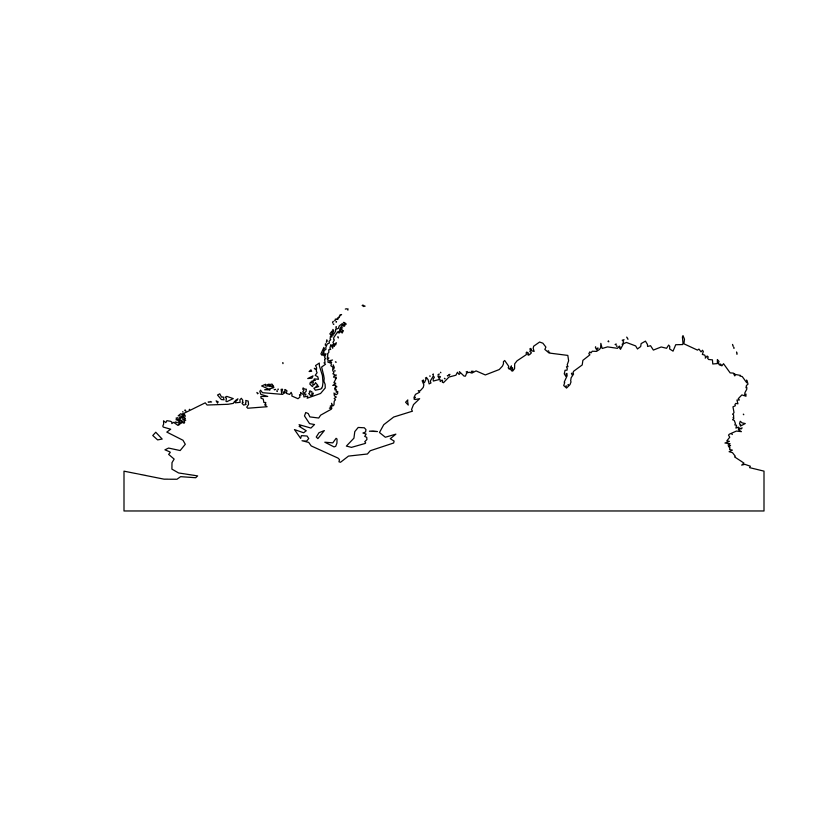

In [15]:
#Create basemap for Antarctica - will need later for some plotting.
data(wrld_simpl)
ant <-  wrld_simpl[wrld_simpl$NAME == "Antarctica", ]
plot(ant)

In [ ]:
#Center and scale ALL data now. Get it out of the way
{
  foo <- scale(ces[3:ncol(ces)], center = TRUE, scale = TRUE)
  ces2 <- data.frame(ces[,1:2], foo)
  str(ces2)
  head(ces)
  head(ces2)
  rm(foo)
  ces <- ces2
}
